# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint
import openweathermapy.core as owm
from citipy import citipy
import requests
import seaborn as sns
from scipy.stats import linregress
from datetime import datetime

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []


# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        

# Print the city count to confirm sufficient count
len(cities)

583

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = 'http://api.openweathermap.org/data/2.5/weather?'
units = 'imperial'
query = f'{url}appid={api_key}&units={units}&q='

country = []
latitude = []
longitude = []
temp = []
humidity = []
clouds = []
windspeed = []
dates = []

for i in range(len(cities)):
    response = requests.get(f'{query}{cities[i]}').json()
    try:
        country.append(response['sys']['country'])
        latitude.append(response['coord']['lat'])
        longitude.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        windspeed.append(response['wind']['speed'])
        dates.append(response['dt'])
    except KeyError:
        country.append(np.nan)
        latitude.append(np.nan)
        longitude.append(np.nan)
        temp.append(np.nan)
        humidity.append(np.nan)
        windspeed.append(np.nan)
        dates.append(np.nan)
    try:
        clouds.append(response['clouds']['all'])
    except KeyError:
        clouds.append(0)
    
    print(f'Processing {i + 1}: {cities[i]}')
    


        

Processing 1: yellowknife
Processing 2: punta arenas
Processing 3: mitsamiouli
Processing 4: atuona
Processing 5: kamenka
Processing 6: neiafu
Processing 7: yulara
Processing 8: rungata
Processing 9: vaini
Processing 10: cape town
Processing 11: upernavik
Processing 12: saint-philippe
Processing 13: lebu
Processing 14: jamestown
Processing 15: severo-kurilsk
Processing 16: busselton
Processing 17: vestmannaeyjar
Processing 18: olafsvik
Processing 19: burshtyn
Processing 20: sunamganj
Processing 21: langsa
Processing 22: albany
Processing 23: bredasdorp
Processing 24: tiksi
Processing 25: lazaro cardenas
Processing 26: cabo san lucas
Processing 27: dunedin
Processing 28: georgetown
Processing 29: new norfolk
Processing 30: bolgatanga
Processing 31: tasiilaq
Processing 32: lavrentiya
Processing 33: kapaa
Processing 34: port elizabeth
Processing 35: naze
Processing 36: norman wells
Processing 37: bluff
Processing 38: ribeira grande
Processing 39: rio grande
Processing 40: victor harbor
Pr

Processing 327: cayenne
Processing 328: pitimbu
Processing 329: luderitz
Processing 330: stokmarknes
Processing 331: berea
Processing 332: plettenberg bay
Processing 333: santiago de chuco
Processing 334: rostock
Processing 335: la asuncion
Processing 336: dingle
Processing 337: amderma
Processing 338: saskylakh
Processing 339: beringovskiy
Processing 340: iqaluit
Processing 341: lata
Processing 342: kemise
Processing 343: petrozavodsk
Processing 344: arak
Processing 345: hereford
Processing 346: uirauna
Processing 347: timberlake
Processing 348: nagato
Processing 349: rawson
Processing 350: nago
Processing 351: sturgis
Processing 352: port macquarie
Processing 353: carnarvon
Processing 354: huambo
Processing 355: inhambane
Processing 356: cabedelo
Processing 357: houma
Processing 358: natal
Processing 359: suihua
Processing 360: kushmurun
Processing 361: coulihaut
Processing 362: ginir
Processing 363: luena
Processing 364: kabalo
Processing 365: bambanglipuro
Processing 366: palabuhan

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
df = pd.DataFrame({'City': cities,
                   'Country': country,
                   'Latitude': latitude,
                   'Longitude': longitude,
                   'Temperature': temp,
                   'Humidity': humidity,
                   'Cloudiness': clouds,
                   'Wind Speed': windspeed,
                   'Date': dates})
df = df.dropna(how='any')
df.head()

,City,Country,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Date
0,yellowknife,CA,62.46,-114.35,64.40,48.0,40,5.82,1.594954e+09
1,punta arenas,CL,-53.15,-70.92,30.20,86.0,0,4.70,1.594954e+09
2,mitsamiouli,KM,-11.38,43.28,74.75,72.0,0,22.37,1.594954e+09
3,atuona,PF,-9.80,-139.03,79.72,76.0,6,17.52,1.594954e+09
4,kamenka,RU,51.32,42.77,57.00,79.0,74,1.01,1.594954e+09


In [5]:
df.to_csv('cities.csv')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
over_100 = df.loc[df['Humidity'] > 100 ]
over_100
#none found...moving on!

,City,Country,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Date


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

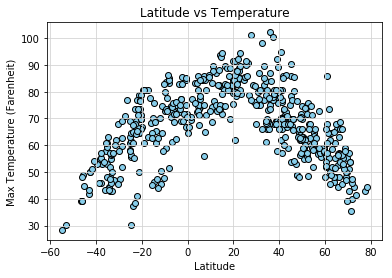

In [33]:
plt.scatter(df['Latitude'], df['Temperature'], edgecolors='black', facecolors='skyblue')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (Farenheit)')
plt.title('Latitude vs Temperature')
plt.grid(b=True, which='major', axis='both', linestyle='-', color='lightgrey')
#save png
plt.savefig('images/fig1.png')
plt.show()

In [29]:
#This graph shows the majority of temperatures are higher the closer you are to the equator(0* Latitude)
#and fall lower the further away you are.

<Figure size 432x288 with 0 Axes>

## Latitude vs. Humidity Plot

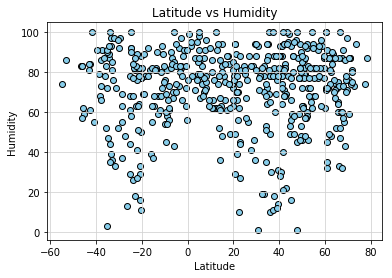

In [34]:
plt.scatter(df['Latitude'], df['Humidity'], edgecolors='black', facecolors='skyblue')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs Humidity')
plt.grid(b=True, which='major', axis='both', linestyle='-', color='lightgrey')
#save png
plt.savefig('images/fig2.png')
plt.show()


In [30]:
#This chart indicates a majority of chosen cities are currently around the 80% mark despite their distance from the equator

<Figure size 432x288 with 0 Axes>

## Latitude vs. Cloudiness Plot

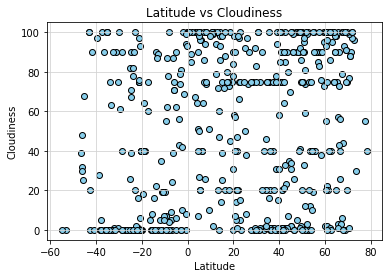

In [35]:
plt.scatter(df['Latitude'], df['Cloudiness'], edgecolors='black', facecolors='skyblue')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude vs Cloudiness')
plt.grid(b=True, which='major', axis='both', linestyle='-', color='lightgrey')
#save png
plt.savefig('images/fig3.png')
plt.show()

In [31]:
#As cloudiness is somewhat random, this chart currently indicates it is cloudier in the northern hemisphere (above 0* Latitude)

<Figure size 432x288 with 0 Axes>

## Latitude vs. Wind Speed Plot

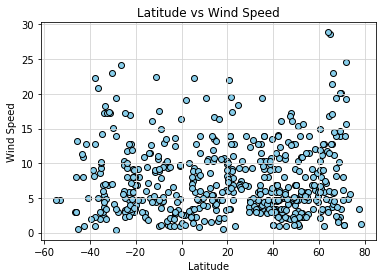

In [36]:
plt.scatter(df['Latitude'], df['Wind Speed'], edgecolors='black', facecolors='skyblue')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude vs Wind Speed')
plt.grid(b=True, which='major', axis='both', linestyle='-', color='lightgrey')
#save png
plt.savefig('images/fig4.png')
plt.show()

In [32]:
#As wind speed is also somewhat random, this chart demonstrates that it is currently windier in the northern hemisphere (above 0* Latitude)

<Figure size 432x288 with 0 Axes>

## Linear Regression

In [17]:
# Create Northern and Southern Hemisphere DataFrames
north_df = df.loc[pd.to_numeric(df['Latitude']).astype(float) > 0, :]
south_df = df.loc[pd.to_numeric(df['Latitude']).astype(float) < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

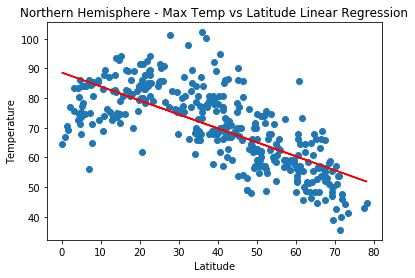

In [37]:
x_values = pd.to_numeric(north_df['Latitude']).astype(float)
y_values = pd.to_numeric(north_df['Temperature']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
r_value = x_values * slope + intercept
plt.scatter(x_values, y_values)
plt.plot(x_values, r_value, 'r-')
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('Northern Hemisphere - Max Temp vs Latitude Linear Regression')
#save png
plt.savefig('images/fig5.png')
plt.show()

In [19]:
#This chart indicates a negative correlation: temperatures decrease the further north from the equator (0* Latitude")


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

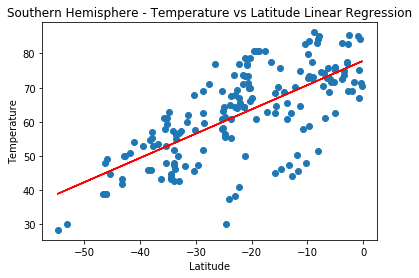

In [45]:
x_values = pd.to_numeric(south_df['Latitude']).astype(float)
y_values = pd.to_numeric(south_df['Temperature']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
r_value = x_values * slope + intercept
plt.scatter(x_values, y_values)
plt.plot(x_values, r_value, 'r-')
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('Southern Hemisphere - Temperature vs Latitude Linear Regression')
#save png
plt.savefig('images/fig6.png')
plt.show()

In [46]:
#This chart shows a positive correlation pictured: Temperatures rise as we travel
#towards the equator (0* Latitude) from the south.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

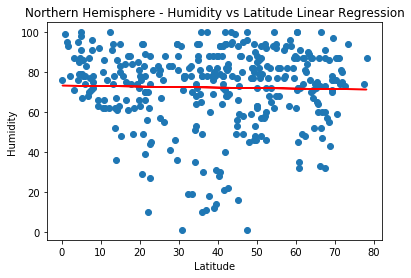

In [44]:
x_values = pd.to_numeric(north_df['Latitude']).astype(float)
y_values = pd.to_numeric(north_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
r_value = x_values * slope + intercept
plt.scatter(x_values, y_values)
plt.plot(x_values, r_value, 'r-')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Northern Hemisphere - Humidity vs Latitude Linear Regression')
#save png
plt.savefig('images/fig7.png')
plt.show()

In [23]:
#I do not believe this chart shows any relevant statistical correlation currently between humidity and location.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

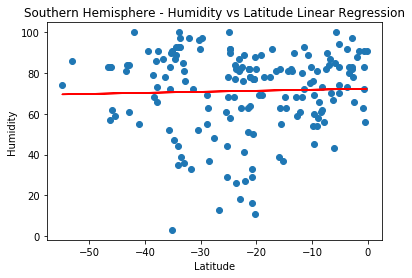

In [43]:
x_values = pd.to_numeric(south_df['Latitude']).astype(float)
y_values = pd.to_numeric(south_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
r_value = x_values * slope + intercept
plt.scatter(x_values, y_values)
plt.plot(x_values, r_value, 'r-')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Southern Hemisphere - Humidity vs Latitude Linear Regression')
#save png
plt.savefig('images/fig8.png')
plt.show()

In [42]:
#I do not believe this chart shows any relevant statistical correlation currently between humidity and location.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

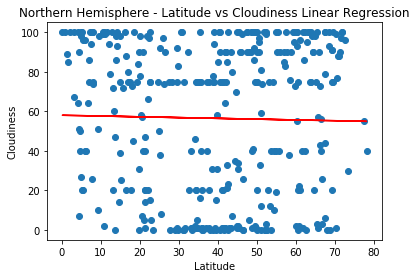

In [49]:
x_values = pd.to_numeric(north_df['Latitude']).astype(float)
y_values = pd.to_numeric(north_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
r_value = x_values * slope + intercept
plt.scatter(x_values, y_values)
plt.plot(x_values, r_value, 'r-')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Northern Hemisphere - Latitude vs Cloudiness Linear Regression')
#save png
plt.savefig('images/fig9.png')
plt.show()

In [ ]:
#I do not believe this chart shows any relevant statistical correlation currently between cloud cover and location.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

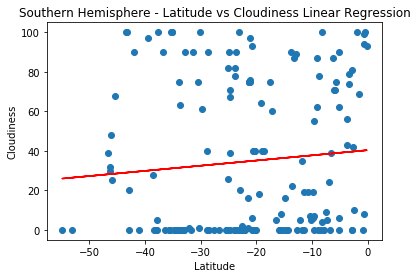

In [51]:
x_values = pd.to_numeric(south_df['Latitude']).astype(float)
y_values = pd.to_numeric(south_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
r_value = x_values * slope + intercept
plt.scatter(x_values, y_values)
plt.plot(x_values, r_value, 'r-')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Southern Hemisphere - Latitude vs Cloudiness Linear Regression')
#save png
plt.savefig('images/fig10.png')
plt.show()

In [52]:
#While this chart shows a slightly positive correlation, I do not consider it statistically significant. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

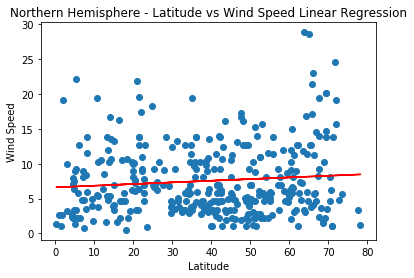

In [53]:
x_values = pd.to_numeric(north_df['Latitude']).astype(float)
y_values = pd.to_numeric(north_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
r_value = x_values * slope + intercept
plt.scatter(x_values, y_values)
plt.plot(x_values, r_value, 'r-')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Northern Hemisphere - Latitude vs Wind Speed Linear Regression')
#save png
plt.savefig('images/fig11.png')
plt.show()

In [ ]:
#While this chart shows a slightly positive correlation, I do not consider it statistically significant. 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

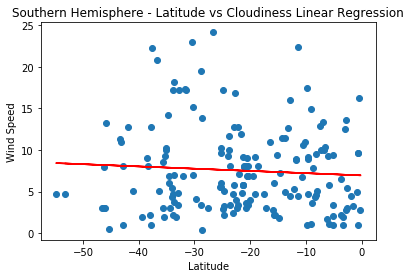

In [55]:
x_values = pd.to_numeric(south_df['Latitude']).astype(float)
y_values = pd.to_numeric(south_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
r_value = x_values * slope + intercept
plt.scatter(x_values, y_values)
plt.plot(x_values, r_value, 'r-')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Southern Hemisphere - Latitude vs Cloudiness Linear Regression')
#save png
plt.savefig('images/fig12.png')
plt.show()

In [ ]:
#This chart shows a slightly negative correlation, but not enough to be statistically relevant.